#### Importing and constant defining section:


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
# to set current working directory coherent_neutrino_scattering/ (not coherent_neutrino_scattering/vis/)
if os.getcwd()[-4:] == '/vis':
    os.chdir('../')
%matplotlib inline

from lib.config import config
import lib.coherent_neutrino_nucleus as cn
import lib.phys_constants as phys
from lib.supernova import single_neutrino_flux


################################# Detector ##########################################################
DISTANCE = 50 # m ()
Ar_MOLAR_MASS = 38.964313 / 1000 # kg/mol
Ar_M = 38.964313 * phys.ATOMIC_MASS_UNIT # MeV
Ar_N = 21
Ar_Z = 18
DETECTOR_MASS = 20 * 1000 # kg
NUMBER_TARGETS = phys.AVOGADRO * DETECTOR_MASS / Ar_MOLAR_MASS

### Sample Reactor Antineutrino Flux and Spectrum

Need to add some info

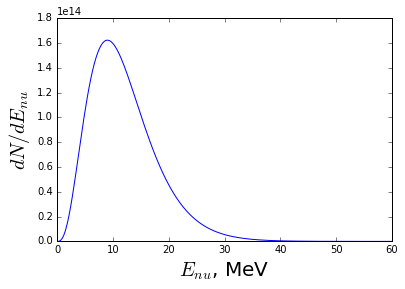

In [5]:
nu_energy_range = np.linspace(0, 60, 200) #MeV
supernova_spectrum = single_neutrino_flux(nu_energy_range)

plt.plot(nu_energy_range, supernova_spectrum)

plt.xlabel('$E_{nu}$, MeV', fontsize=20)
plt.ylabel('$ dN/dE_{nu} $', fontsize=20)

### Kinetic energy spectrum of recoil nuclei

$$ \frac{dN}{dT} = \int dE_{\nu} \frac{dF_{\nu}}{dE_{\nu}} \frac{d\sigma(E_{\nu})}{dT} $$


Initial def:

In [8]:
nucleus_max_kinetic = cn.max_kinetic_recoil_nucleus(Ar_M, nu_energy_range[nu_energy_range.size - 1]) # MeV
nucleus_kinetic_range = np.linspace(0, nucleus_max_kinetic, 100)

Producing recoil nuclei spectrum (integration):

/home/krab/workdir/simulation/coherent_neutrino_scattering/lib/coherent_neutrino_nucleus.py:41: RuntimeWarning: invalid value encountered in double_scalars
  differential_cs = G_FERMI**2 / (4 * math.pi) * Q_weak**2 * nucleus_m * (1 - (nucleus_m * nucleus_kin) / (2 * nu_energy**2))


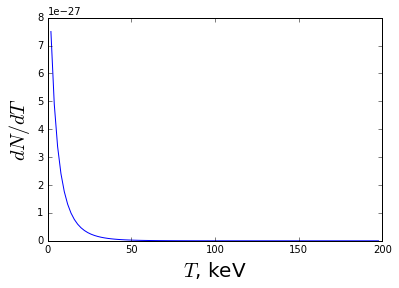

In [14]:
en_increment = nu_energy_range[1] - nu_energy_range[0]
nucleus_kinetic_spectrum = []

for nucleus_kinetic in nucleus_kinetic_range:
    #min nu energy to integrate
    min_nu_energy = cn.min_energy_neutrino_produce_recoil_nucleus(Ar_M, nucleus_kinetic) 
    #index in nu_energy_range
    first_index = np.argmax(nu_energy_range >= min_nu_energy)
    probability_density = 0
    
    for i in range(first_index, nu_energy_range.size):
        diff_cs = cn.differential_cross_section_for_nucleus_kinetic(Ar_Z, Ar_N, Ar_M, nu_energy_range[i], nucleus_kinetic)
        diff_cs *= phys.CONVERSION_hc**2 ## MeV^-2 ---> m^2
        probability_density += en_increment * supernova_spectrum[i] * diff_cs
        
    nucleus_kinetic_spectrum.append(probability_density)

nucleus_kinetic_spectrum = np.array(nucleus_kinetic_spectrum)

plt.plot(nucleus_kinetic_range*1000, nucleus_kinetic_spectrum)
plt.xlabel('$T}$, keV', fontsize=20)
plt.ylabel('$ dN/dT$', fontsize=20)

In [22]:
total_events = 0.
treashold = 0.1 / 1000 # MeV
delta_kin = nucleus_kinetic_range[1] - nucleus_kinetic_range[0]
for i in range(nucleus_kinetic_range.size):
    if nucleus_kinetic_range[i] < treashold:
        continue
    total_events += nucleus_kinetic_spectrum[i] * delta_kin
    
total_events * NUMBER_TARGETS

16.125531353645897

In [23]:
nucleus_kinetic_range

array([ 0.        ,  0.00199718,  0.00399435,  0.00599153,  0.00798871,
        0.00998589,  0.01198306,  0.01398024,  0.01597742,  0.0179746 ,
        0.01997177,  0.02196895,  0.02396613,  0.02596331,  0.02796048,
        0.02995766,  0.03195484,  0.03395202,  0.03594919,  0.03794637,
        0.03994355,  0.04194073,  0.0439379 ,  0.04593508,  0.04793226,
        0.04992944,  0.05192661,  0.05392379,  0.05592097,  0.05791815,
        0.05991532,  0.0619125 ,  0.06390968,  0.06590686,  0.06790403,
        0.06990121,  0.07189839,  0.07389557,  0.07589274,  0.07788992,
        0.0798871 ,  0.08188428,  0.08388145,  0.08587863,  0.08787581,
        0.08987299,  0.09187016,  0.09386734,  0.09586452,  0.0978617 ,
        0.09985887,  0.10185605,  0.10385323,  0.10585041,  0.10784758,
        0.10984476,  0.11184194,  0.11383912,  0.11583629,  0.11783347,
        0.11983065,  0.12182783,  0.123825  ,  0.12582218,  0.12781936,
        0.12981654,  0.13181371,  0.13381089,  0.13580807,  0.13